# Price Laptops Analysis

We have in front of us a data analysis that includes various parameters of laptops along with their prices. Our main objective is to determine which parameters have the most significant influence on the final price.

There are several stages we will go through:

#### 1. Data Exploration and Visualization

* We will examine basic statistics of numerical features.
* We will visualize graphs that display the relationship between numeric and categorical features with the 'Price' feature.

#### 2. Construction of a Linear Regression Model

* We will build a model using all available features.
* We will assess the significance of each feature.

#### 3. Construction of a Random Forest Regression Model

* We will determine if utilizing a random forest regression model improves the results.
* We will gain insights into the model's explanations.

#### 4. Summary

* We will draw conclusions and provide recommendations based on the analysis.

Please note that these stages will help us uncover the key factors influencing laptop prices and make informed decisions based on the findings.


### 1. Data Exploration and Visualization
#### 1.1 Loading data and basic statistics

In [39]:
# import basic library using to analyst

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [40]:
# loading cleaning data

data = pd.read_csv('.\\data\\cleaning_data.csv')
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,ResolutionType,Touchscreen,IPS,CpuSpeed,CpuMark,MemoryGB,MemoryKind,Price
1226,MSI,Gaming,15.6,1920x1080,8.0,Nvidia,Windows 10,2.40,Full HD,No,No,2.6,Intel,1152.0,SSD,65481.1200
811,Asus,Gaming,17.3,1920x1080,16.0,Nvidia,Windows 10,2.90,Full HD,No,No,2.8,Intel,1280.0,SSD,128884.3200
910,MSI,Gaming,15.6,1920x1080,8.0,Nvidia,Windows 10,2.20,Full HD,No,No,2.8,Intel,1152.0,SSD,63882.7200
685,Dell,Notebook,15.6,1920x1080,8.0,Intel,Windows 10,2.18,Full HD,No,No,2.5,Intel,256.0,SSD,42357.6000
1159,Lenovo,Gaming,15.6,1920x1080,8.0,Nvidia,Windows 10,2.40,Full HD,No,Yes,2.5,Intel,1024.0,HDD,43636.3200
857,Asus,Notebook,14.1,1366x768,4.0,Intel,Windows 10,1.65,HD,No,No,1.1,Intel,32.0,Flash,18541.4400
927,Dell,Gaming,17.3,3840x2160,16.0,Nvidia,Windows 10,4.36,4K Ultra HD,No,Yes,2.8,Intel,1536.0,SSD,168045.1200
279,Lenovo,Notebook,15.6,1920x1080,8.0,Nvidia,No OS,2.20,Full HD,No,No,2.7,Intel,1024.0,HDD,35112.0528
1215,Lenovo,Notebook,15.6,1920x1080,8.0,Intel,No OS,2.30,Full HD,No,Yes,2.5,Intel,256.0,SSD,30529.4400
501,Asus,Netbook,11.6,1366x768,2.0,Intel,Windows 10,1.10,HD,No,No,1.1,Intel,32.0,Flash,13053.6000


In [41]:
# shape a table adn basic statistics for numeric features

print(data.shape)
data.describe().T

(1270, 16)


,count,mean,std,min,25%,50%,75%,max
Inches,1270.0,15.131890,1.955256,10.1000,14.00,15.60,15.6000,35.60
Ram,1270.0,8.457480,5.566930,1.0000,4.00,8.00,8.0000,64.00
Weight,1270.0,2.077677,0.808377,0.0002,1.50,2.04,2.3200,11.10
CpuSpeed,1270.0,2.298598,0.507204,0.9000,2.00,2.50,2.7000,3.60
MemoryGB,1270.0,622.100787,481.293224,8.0000,256.00,500.00,1024.0000,2560.00
Price,1270.0,59886.072669,37323.784300,9270.7200,31914.72,52054.56,79303.8168,324954.72


In [42]:
# one thing that catches attention is the minimum value of Weight, which is 0.0002 kg, which is not normal
# let's examine the entire record

data[data['Weight'] == 0.0002]

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,ResolutionType,Touchscreen,IPS,CpuSpeed,CpuMark,MemoryGB,MemoryKind,Price
338,Dell,Ultrabook,15.6,1920x1080,8.0,AMD,Windows 10,0.0002,Full HD,No,No,1.6,Intel,1024.0,HDD,35324.64


In [43]:
# since this is a unit-related issue, we will remove that row and display the basic statistics again

data = data.drop(data[data['Weight'] == 0.0002].index)
print(data.shape)
data.describe().T

(1269, 16)


,count,mean,std,min,25%,50%,75%,max
Inches,1269.0,15.131521,1.955982,10.10,14.00,15.60,15.6000,35.60
Ram,1269.0,8.457841,5.569109,1.00,4.00,8.00,8.0000,64.00
Weight,1269.0,2.079314,0.806587,0.69,1.50,2.04,2.3200,11.10
CpuSpeed,1269.0,2.299149,0.507024,0.90,2.00,2.50,2.7000,3.60
MemoryGB,1269.0,621.784082,481.350565,8.00,256.00,500.00,1024.0000,2560.00
Price,1269.0,59905.427620,37332.122508,9270.72,31914.72,52054.56,79333.3872,324954.72


#### 1.2 Data visualization

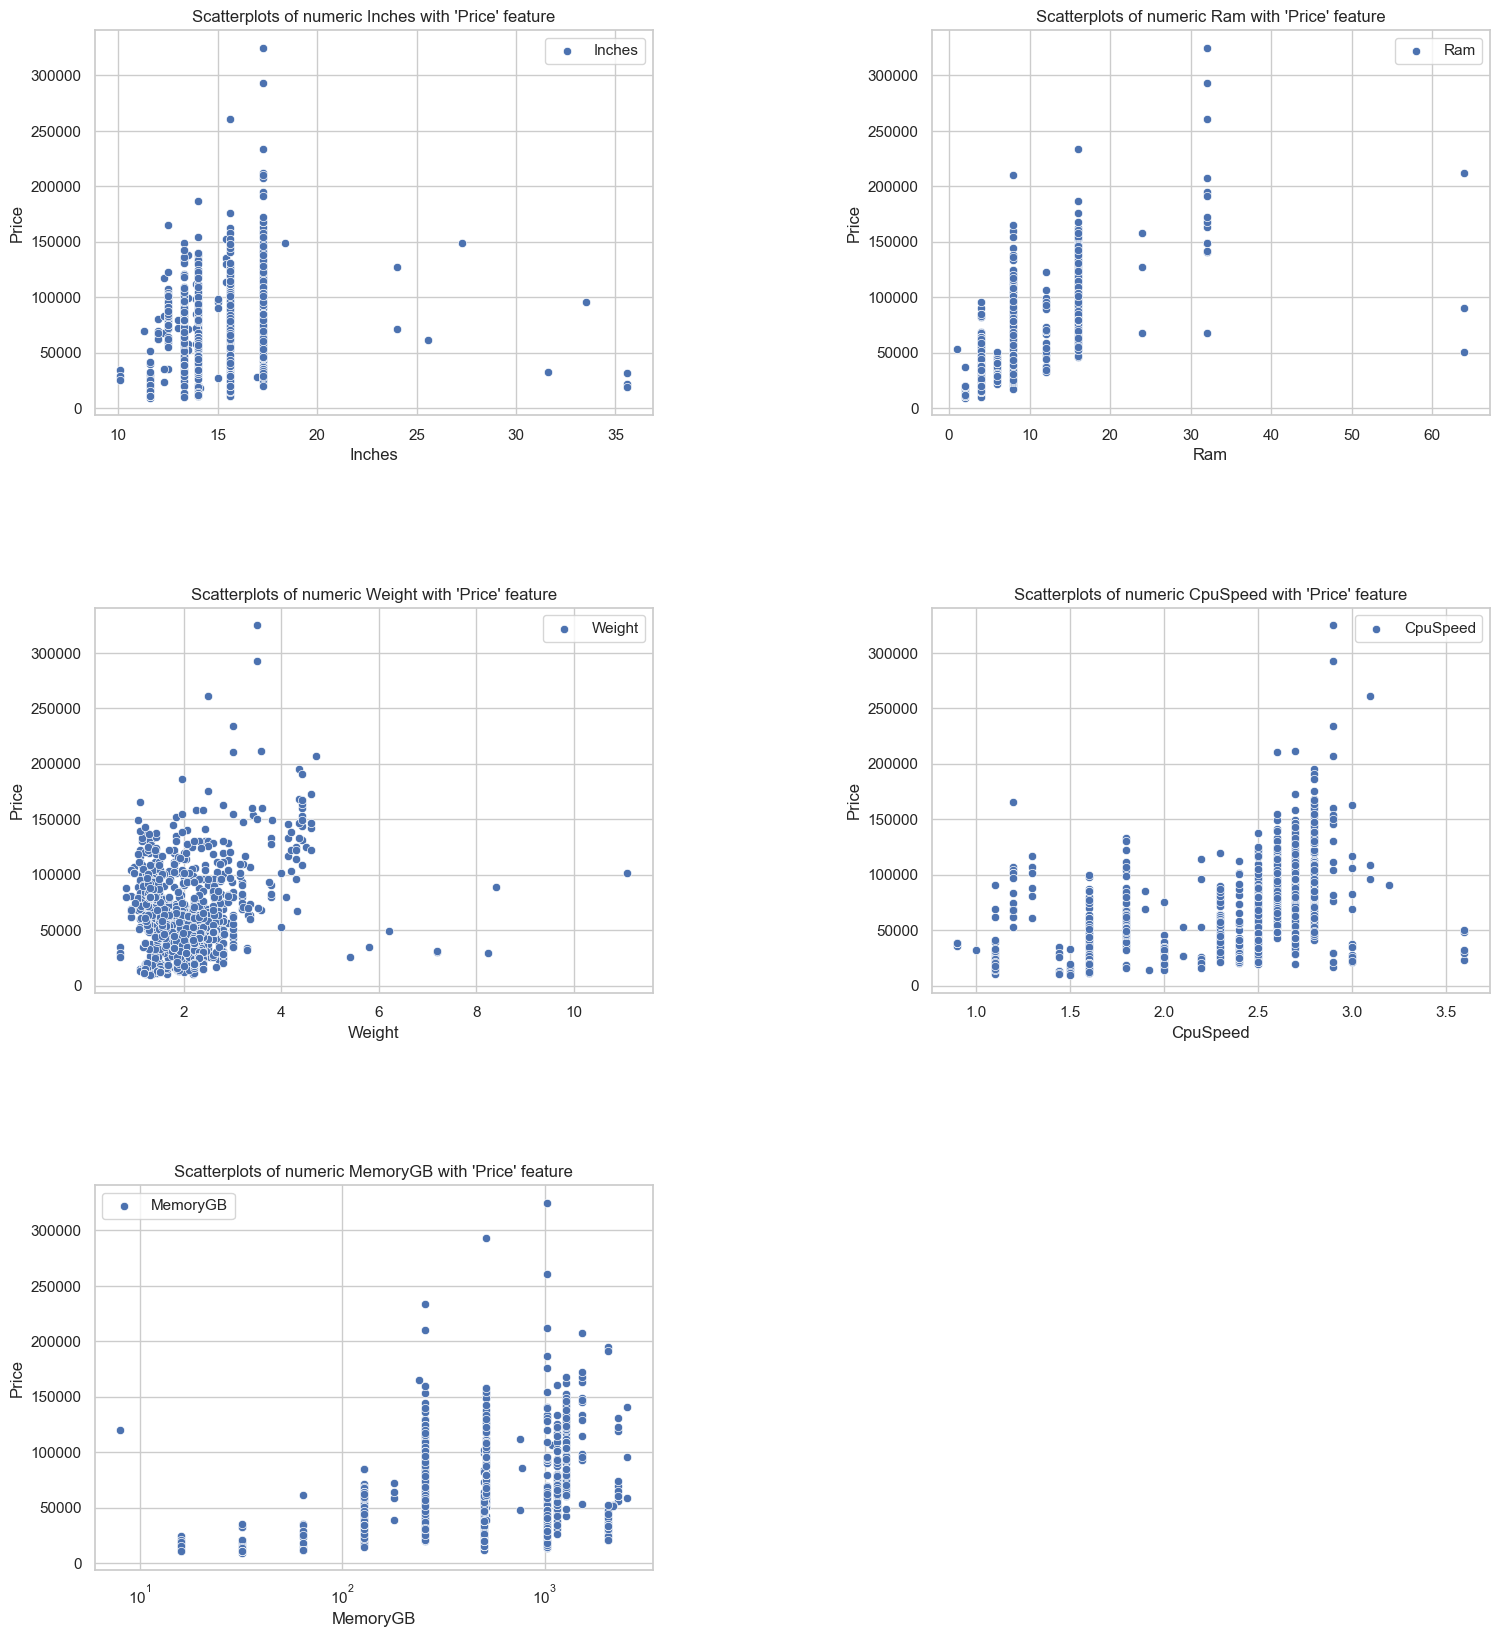

In [44]:
# let's display scatterplots that depict the relationship between numeric features and the 'Price' feature

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    if cols == 'MemoryGB':
        plt.xscale('log')
    sns.scatterplot(x=cols, y='Price', data=data, label=cols)
    plt.ylabel('Price')
    plt.title(f"Scatterplots of numeric {cols} with 'Price' feature")
plt.show()

#### Conclussions

We observe that the rare of features does not exhibit a clear correlation with the predicted variable 'Price'. However, there are noticeable trends where the value of the 'Price' variable tends to increase with higher values of the descriptive features.

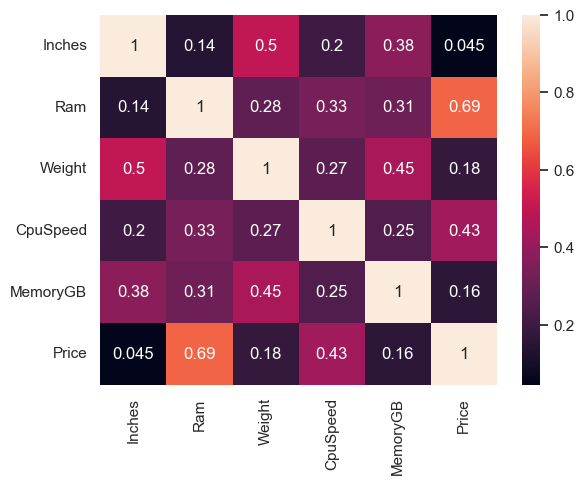

In [45]:
# let's see the Pearson correlation matrix between numeric variables

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB', 'Price']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Conclussions
We observe two important findings:

* There is a significant correlation between the 'Ram' and 'Price' variables.
* The correlation between the 'Inches', 'Weight', and 'Memory_GB' variables with the 'Price' variable is less than 0.2.

These variables may have relatively little impact on the final price.

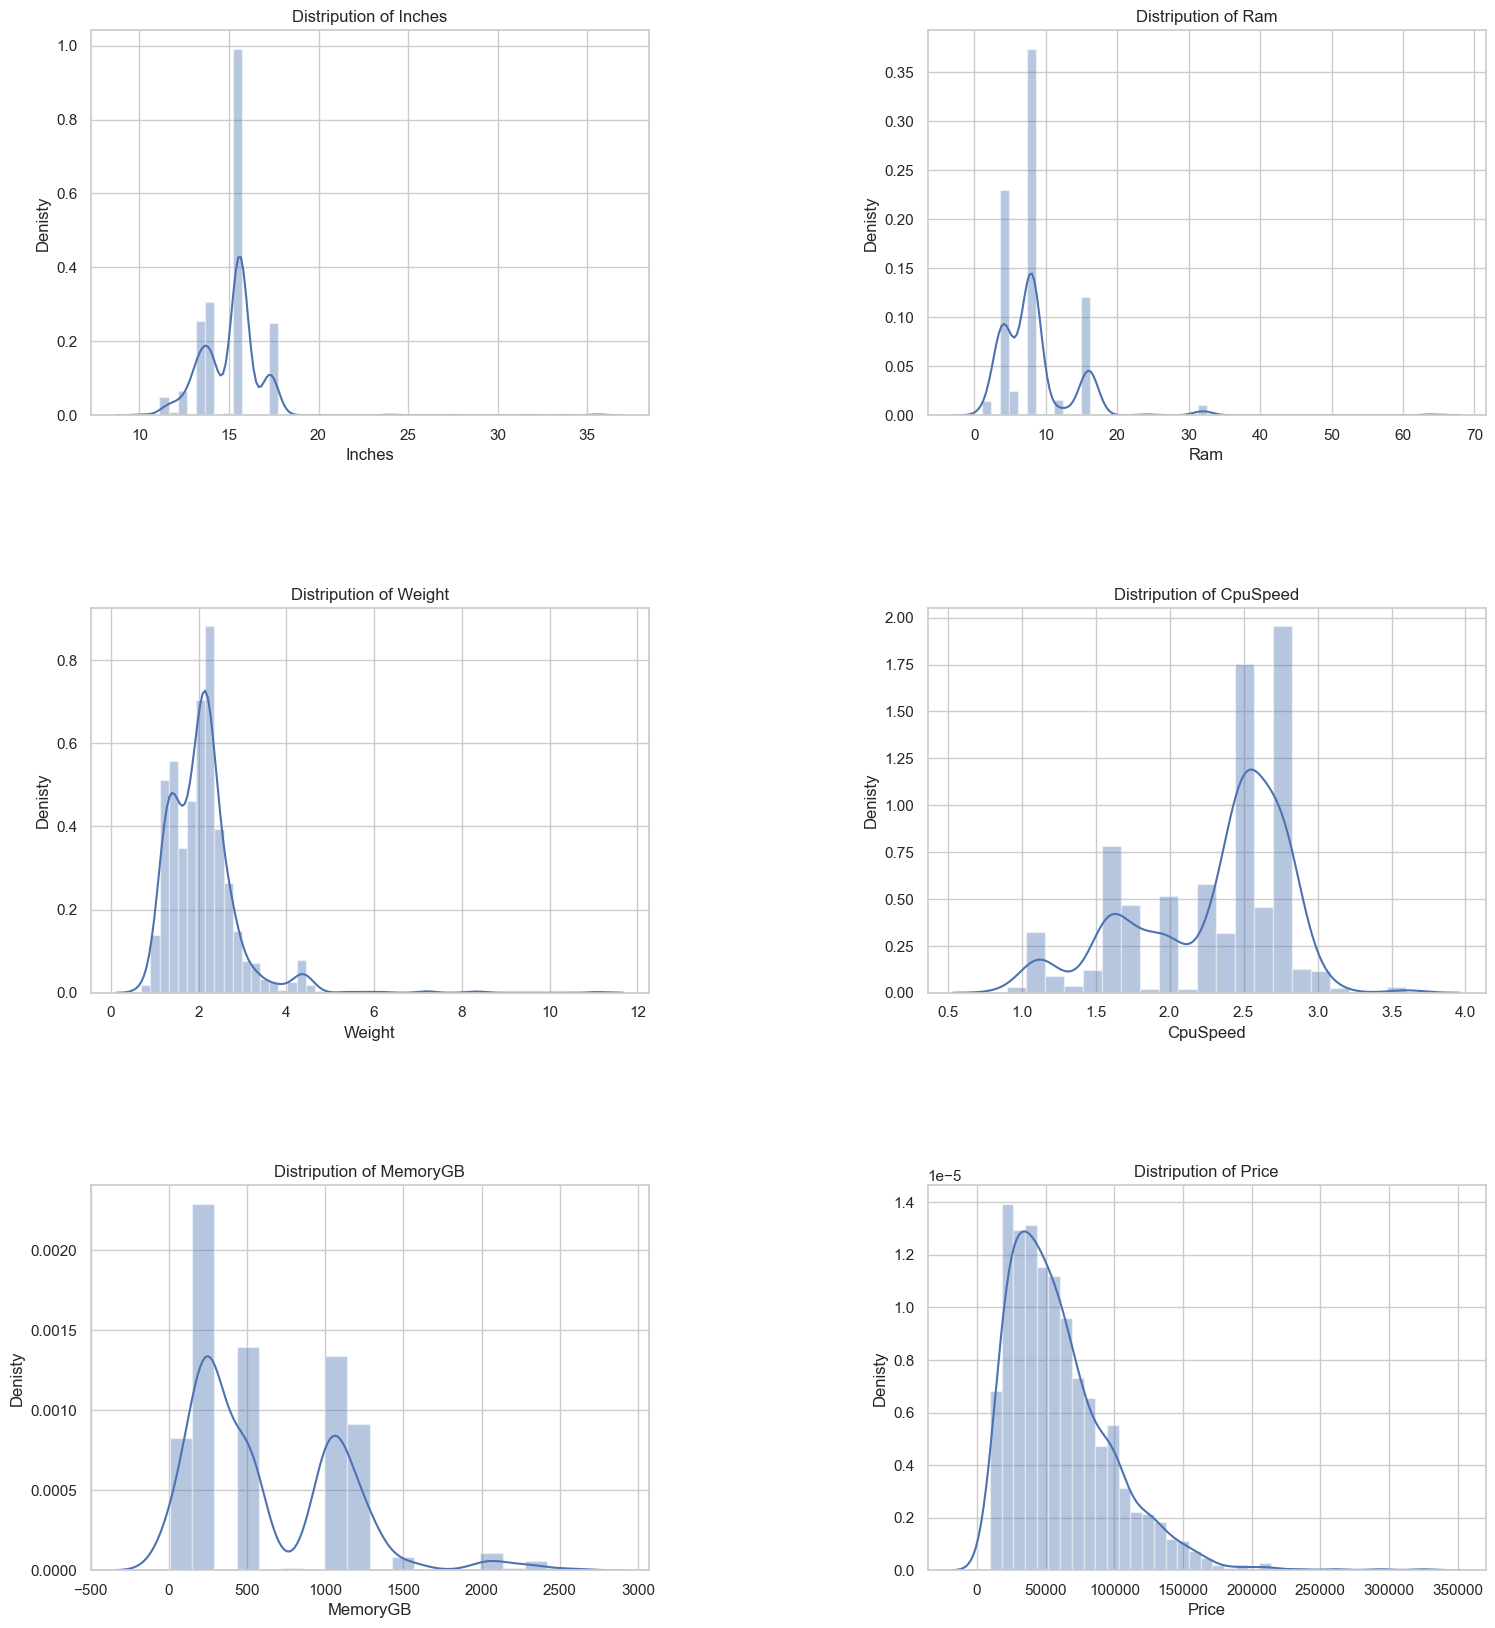

In [46]:
# let's see the histograms for numeric variables along with the estimated distribution density line

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB', 'Price']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[cols])
    plt.ylabel('Denisty')
    plt.title(f"Distripution of {cols}")
plt.show()

#### Conclusions

Please note that the distribution of 'Price' is not normal. We can observe that the majority of laptops in the market have lower prices, and as the price increases, the number of laptops decreases significantly. This indicates that expensive laptops are relatively less common in the market.

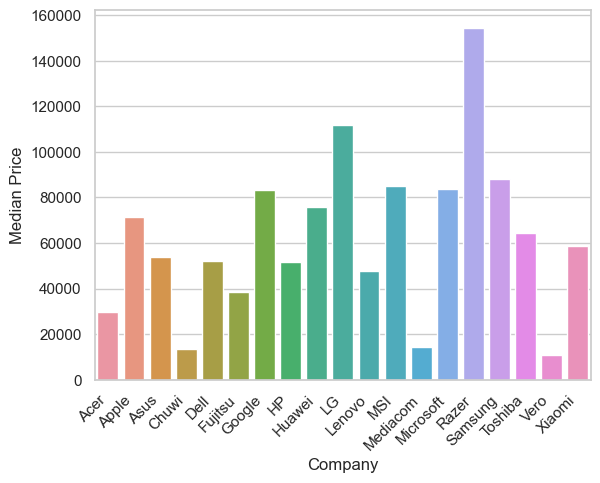

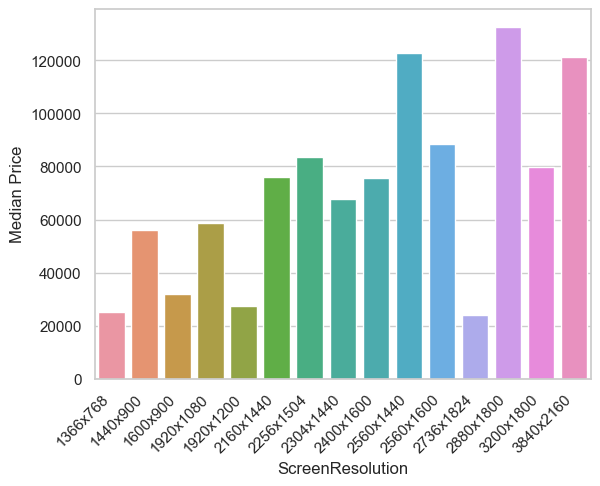

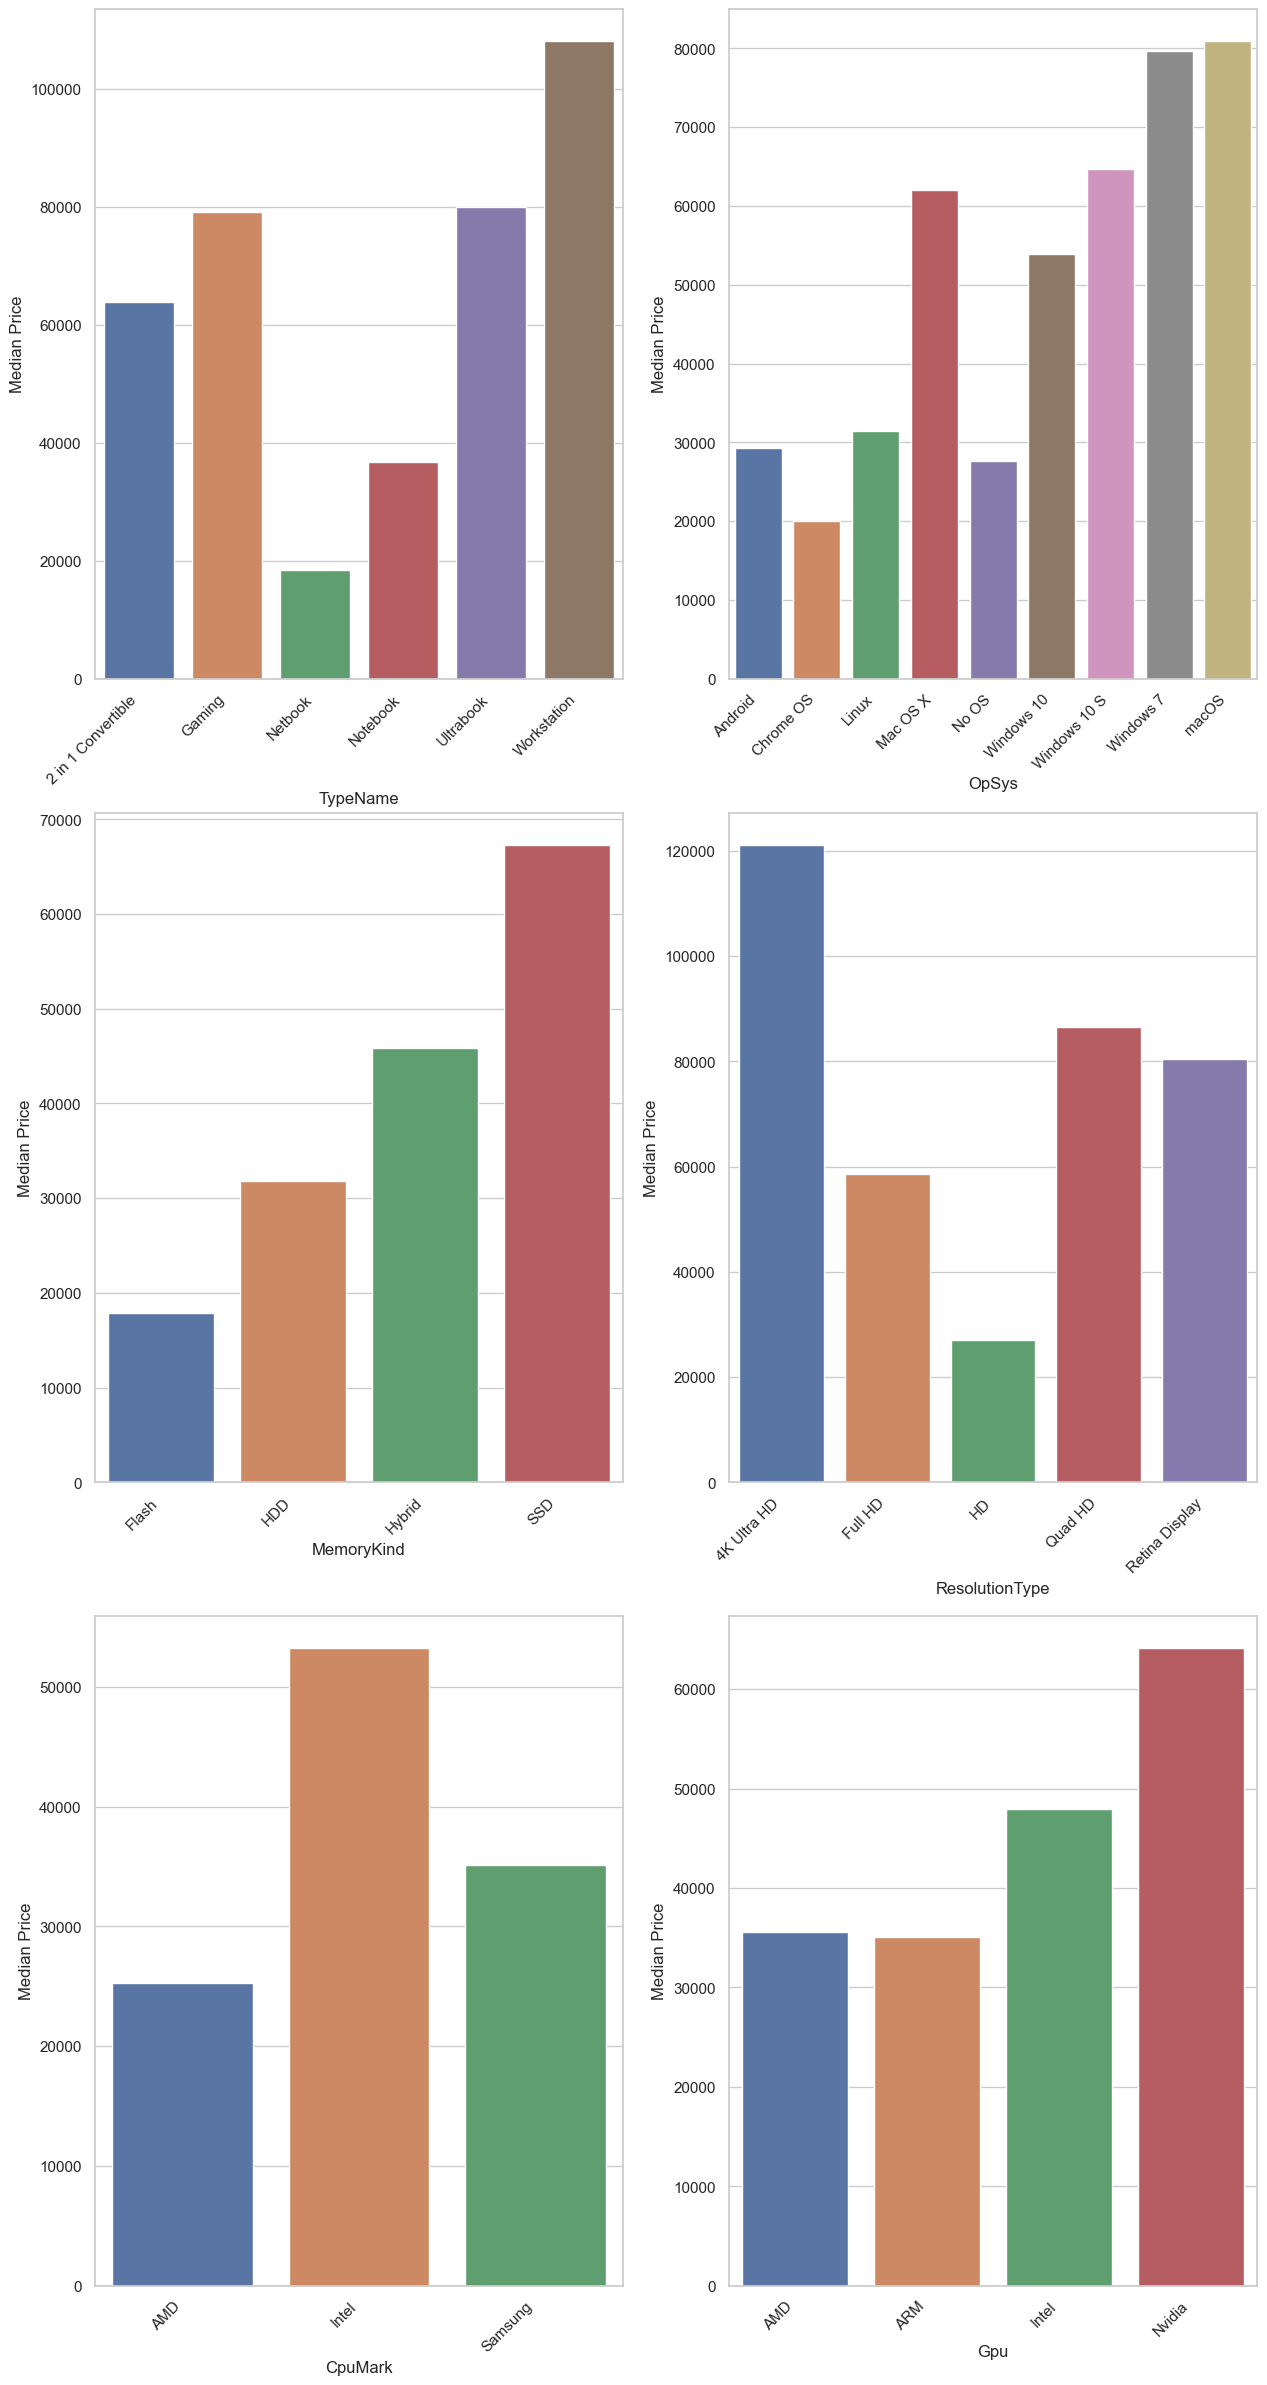

In [47]:
# now let's look at the bar plots for categorical data, which will show how the median price in each class looks like
# we will use the median because 'Price' is not normally distributed and the mean could be misleading

def draw_plot(feature):
    df_grouped = data.groupby(feature)['Price'].median().reset_index()
    sns.barplot(x=feature, y="Price", data=df_grouped)
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Median Price")

draw_plot('Company')
plt.show()

draw_plot('ScreenResolution')
plt.show()

plt.figure(1, figsize=(15,40))
categorical_features = ['TypeName', 'OpSys', 'MemoryKind', 'ResolutionType', 'CpuMark', 'Gpu']
n=0
for col in categorical_features:
    n += 1
    plt.subplot(4, 2, n)
    draw_plot(col)
plt.show()

#### Conclussions

Note that for each categorical features there is some price differentiation in its classes, 
which indicates that they may be important in the model.


### 2. Construction of a Linear Regression Model

We will follow the strategy of initially using all the features to build the models. Then, we will remove the features that we suspect have no impact on the 'Price' variable. Subsequently, we will compare the results and evaluate the usefulness of the model.

To encode categorical features, we will utilize LabelEncoder coding.

#### 2.1 Linear Regression Model using all features

In [48]:
# now we want remowe outliers from dataset:

numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight', 'Price']

for column in numeric_features:
    lower_bound = data[column].quantile(0.01)
    upper_bound = data[column].quantile(0.99)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [50]:
# Requirements import and create functions

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def label_codding(df: pd.DataFrame, cat_features: list[str]) -> pd.DataFrame:
    encoder = LabelEncoder()
    df_cat = df[cat_features].copy()
    for column in cat_features:
        df_cat[column] = encoder.fit_transform(df_cat[column])
    return df_cat


def standard_scaler_codding(df: pd.DataFrame, num_features: list[str]) -> pd.DataFrame:
    encoder = StandardScaler()
    df_num = df[num_features].copy()
    for column in num_features:
        df_num[column] = encoder.fit_transform(df_num[column].values.reshape(-1, 1))
    return df_num


def codding(df: pd.DataFrame, cat_features: list[str], num_features: list[str], strategy_cat=None, strategy_num=None) -> pd.DataFrame:
    """
    strategy_cat = [one_hot, label]
    strategy_num = [standard]
    """
    if strategy_cat == 'one_hot':
        df_one_hot = one_hot_codding(df, cat_features)
        df_num = standard_scaler_codding(df, num_features)
        X = pd.concat([df_one_hot, df_num], axis=1)
    else:
        df_label = label_codding(df, cat_features)
        df_num = standard_scaler_codding(df, num_features)
        X = pd.concat([df_label, df_num], axis=1)
    return X


def raport(model, X_train, X_test, y_train, y_test) -> None:
    print(f'Model score on train dataset: {model.score(X_train, y_train):.2f}')
    print(f'Model score on test dataset: {model.score(X_test, y_test):.2f}')
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Square Error (MSE): {mse:.2f}')
    mae = mean_absolute_error(y_test, predictions)
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    
    print('A plot illustrating the accuracy of predictions:')
    plt.scatter(y_test, predictions, s=15)
    plt.xlabel('Y Test(True Values)')
    plt.ylabel('Predicted Values')
    plt.plot(y_test, y_test, color='red', lw=1)
    plt.show()
    print('A plot illustrating the denisty of residuals of the model:')
    sns.displot((y_test-predictions),kde=True, bins=50);


Model score on train dataset: 0.69
Model score on test dataset: 0.67
Mean Square Error (MSE): 348305988.77
Mean Absolute Error (MAE): 14057.65
A plot illustrating the accuracy of predictions.


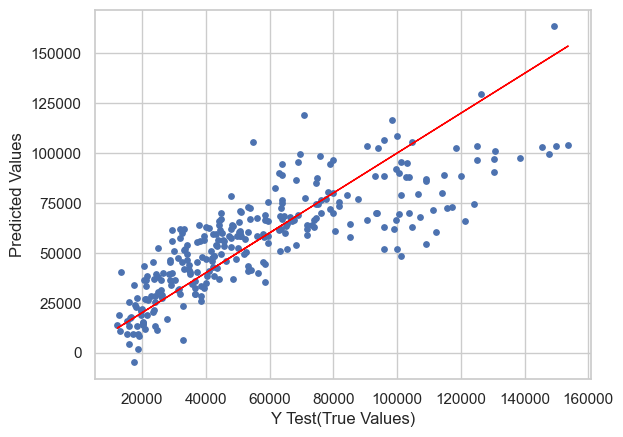

A plot illustrating the denisty of residuals of the model.


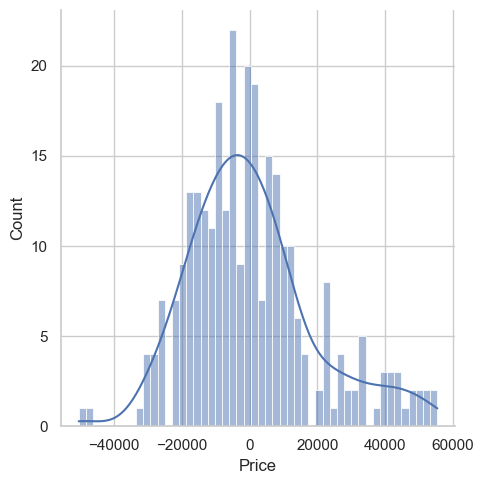

In [51]:
# building a linear model using all features

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_1 = LinearRegression()

model_1.fit(X_train, y_train)

raport(model_1, X_train, X_test, y_train, y_test)

#### Model coefficients

In [52]:
# Obtaining features names
feature_names = categorical_features + numeric_features

# Obtaining coefficients values
coefficients = model_1.coef_

feature_and_coef = pd.DataFrame({'feature': feature_names, 'coef': coefficients}).sort_values('coef', ascending=False)

feature_and_coef


,feature,coef
10,Ram,14746.522125
6,CpuMark,14402.236757
8,Touchscreen,5989.353328
11,CpuSpeed,5889.186528
14,Weight,5292.753867
5,MemoryKind,4997.745606
4,OpSys,4118.627012
1,TypeName,2758.134576
2,ScreenResolution,2134.465406
7,Gpu,1743.717537


### Evaluation

We observe that our model explains 69% of the cases in the training set and 67% of the cases in the test set. This indicates that our model is not overfitting, but the overall performance is not ideal.

In the scatterplot of the actual price and the predicted price, we can see that the model generally predicts the price accurately, with only a few outliers. The model tends to underestimate the lower prices and overestimate the higher actual prices.

The residuals of the model, obtained by subtracting the predicted price from the actual price, exhibit a normal distribution, as shown in the residual density plot.

The most important parameter that influences the price of the model is the amount of RAM.

#### 2.2 Linear Regression Model using choseen features

Let's consider whether we can improve the results of the linear regression model by feature extraction.

In [ ]:
# We will use the RFECV feature selection method to find the optimal linear regression model. We use Label Encoder to codding 
# categorical data, becouse it's check wchich features are important.

from sklearn.feature_selection import RFECV

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y_ = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = LinearRegression()
                         
rfecv = RFECV(estimator=model)

rfecv.fit(X_train, y_train)
                         
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Choceen features: {X.columns[rfecv.support_]}")                        
print("Features rank:", rfecv.ranking_)


#### Conclusions

We can see that the algorithm has indicated that the optimal linear model contains all the features.

In [ ]:
# example: Linear Reression model with chosen features


categorical_features = ['MemoryKind', 'CpuMark', 'Gpu']
numeric_features = ['Ram', 'MemoryGB', 'CpuSpeed']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y_ = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_2 = LinearRegression()

model_2.fit(X_train, y_train)

raport(model_2, X_train, X_test, y_train, y_test)




We see that scores are worse.

### 3. Construction of a Random Forest Regression Model

We will now use the Random Forest Regressor algorithm to build a regression model. We will examine whether the results improve and if the model can better predict the price while explaining the influence of individual parameters on its magnitude.

Model score on train dataset: 0.97
Model score on test dataset: 0.82
Mean Square Error (MSE): 188753970.57
Mean Absolute Error (MAE): 9455.71
A plot illustrating the accuracy of predictions.


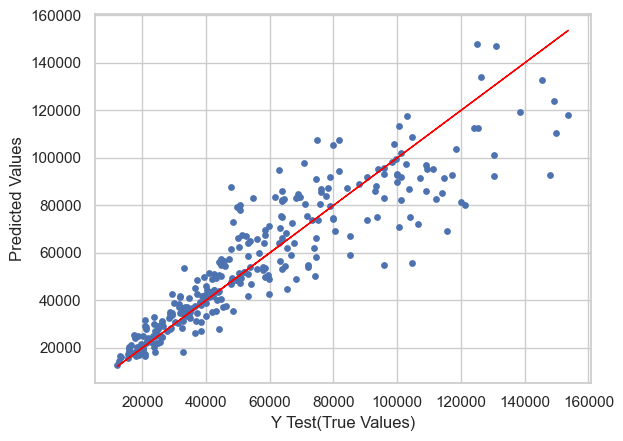

A plot illustrating the denisty of residuals of the model.


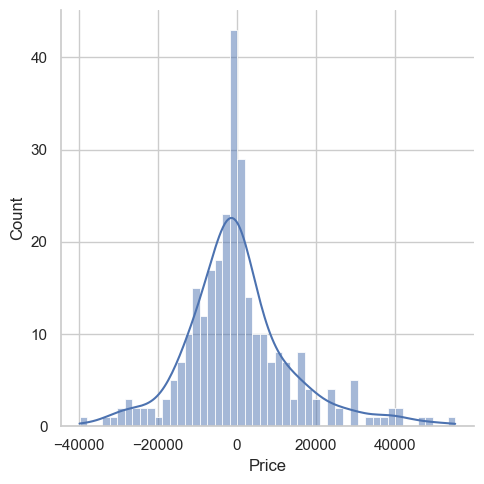

In [55]:
# Firs we develop model with all features and see results. 

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_3 = RandomForestRegressor()

model_3.fit(X_train, y_train)

raport(model_3, X_train, X_test, y_train, y_test)

#### Evaluation 

Widzimy znaczącą poprawę wyników dokładności modelu w porównaniu do modelu liniowego. Różnica w dokładności dla zbioru trenującego i testowego wynika z rodzaju algorytmu, ponieważ drzewa decyzyjne zawsze osiągają dokładność bliską 1 na zbiorze treningowym. Ponownie widzimy tendęcję, że model myli się pardziej w predykcji, gdy rzeczywista cena jest z tych wyższych.

The residuals of the model, obtained by subtracting the predicted price from the actual price, exhibit a normal distribution, as shown in the residual density plot.

In [57]:
from sklearn.model_selection import GridSearchCV


categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Przeszukiwanie siatki w celu znalezienia optymalnych hiperparametrów
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Najlepsze znalezione parametry
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


Model score on train dataset: 0.97
Model score on test dataset: 0.82
Mean Square Error (MSE): 189769842.54
Mean Absolute Error (MAE): 9569.50
A plot illustrating the accuracy of predictions.


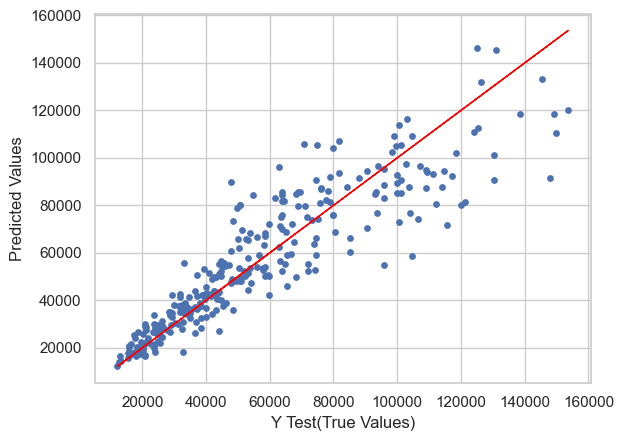

A plot illustrating the denisty of residuals of the model.


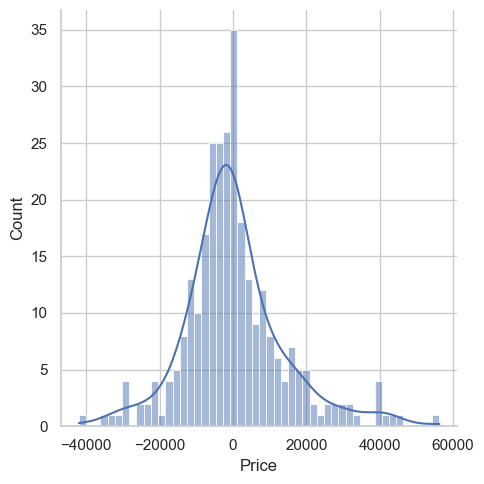

In [62]:
# hiperparametr zmieniony

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_3 = RandomForestRegressor(n_estimators=300)

model_3.fit(X_train, y_train)

raport(model_3, X_train, X_test, y_train, y_test)

In [54]:
# Obtaining feature names
feature_names = categorical_features + numeric_features
# Obtaining feature importances
importances = model_3.feature_importances_

feature_and_importances = pd.DataFrame({'feature': feature_names, 'importances': list(importances)}).sort_values('importances', ascending=False)
feature_and_importances

,feature,importances
10,Ram,0.543978
14,Weight,0.144937
11,CpuSpeed,0.068376
1,TypeName,0.055136
5,MemoryKind,0.032183
0,Company,0.027299
2,ScreenResolution,0.027124
13,Inches,0.024166
12,MemoryGB,0.023113
4,OpSys,0.015493


#### Conclusions

Let's note that once again, the parameter that has the greatest impact on the laptop price is the amount of RAM.

## 4. SUMMARY

In [ ]:
Podsumowując analizę chciałbym zwrócić uwagę na kilka rzeczy:
1. Dane: mała liczba, niektóre parametry słabo opisane.

2. Rekomendacja modelu i trendy jak się kształtuje cena, ilość laptopów na rynku: 
    
3. Najważniejsze parametry
